<a href="https://colab.research.google.com/github/Shicukoe/labmulti/blob/main/MLP_AI_Runfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [ ]:
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.8 MB

In [ ]:
!pip install emnist

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
from emnist import extract_test_samples
from emnist import extract_training_samples
from sklearn.metrics import f1_score, precision_score, recall_score


# DEBUGGING

In [ ]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard
# Clear any logs from previous runs.
!rm -rf ./.logs/

# PREPROCESSING

In [ ]:
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')
#The training dataset consists of 124800 28x28px images of hand-written letters from a to z.

#The test dataset consists of 20800 28x28px images.

In [ ]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# y is the labels of the trainning set and test set
# Match the sequence of labels:
y_train = y_train -1
y_test = y_test -1



In [ ]:
#The trainning dataset consists of 128,000 28x28 px images
print("Feature matrix:", x_train.shape)
#The test dataset consists of 20,800 28x28 images
print("Target matrix:", x_test.shape)

#Đánh số thứ tự ảnh từ 1 -> 128,000
print("Feature matrix:", y_train.shape)
#Đánh số thứ tự ảnh từ 1 -> 20,800
print("Target matrix:", y_test.shape)


Feature matrix: (124800, 28, 28)
Target matrix: (20800, 28, 28)
Feature matrix: (124800,)
Target matrix: (20800,)


In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,20.0,109.0,114.0,45.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,114.0,245.0,253.0,214.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,125.0,249.0,254.0,233.0,22.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,4.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,82.0,233.0,254.0,251.0,82.0,2.0,0.0,...,0.0,0.0,3.0,77.0,125.0,113.0,8.0,0.0,0.0,0.0
6,0.0,0.0,0.0,37.0,217.0,254.0,254.0,128.0,5.0,0.0,...,0.0,22.0,154.0,247.0,254.0,253.0,111.0,3.0,0.0,0.0
7,0.0,0.0,0.0,37.0,217.0,254.0,254.0,160.0,16.0,0.0,...,10.0,95.0,232.0,254.0,254.0,246.0,77.0,2.0,0.0,0.0
8,0.0,0.0,0.0,39.0,217.0,254.0,254.0,184.0,25.0,0.0,...,128.0,221.0,253.0,255.0,252.0,177.0,8.0,0.0,0.0,0.0
9,0.0,0.0,0.0,115.0,245.0,254.0,254.0,217.0,37.0,9.0,...,254.0,254.0,254.0,254.0,232.0,109.0,0.0,0.0,0.0,0.0


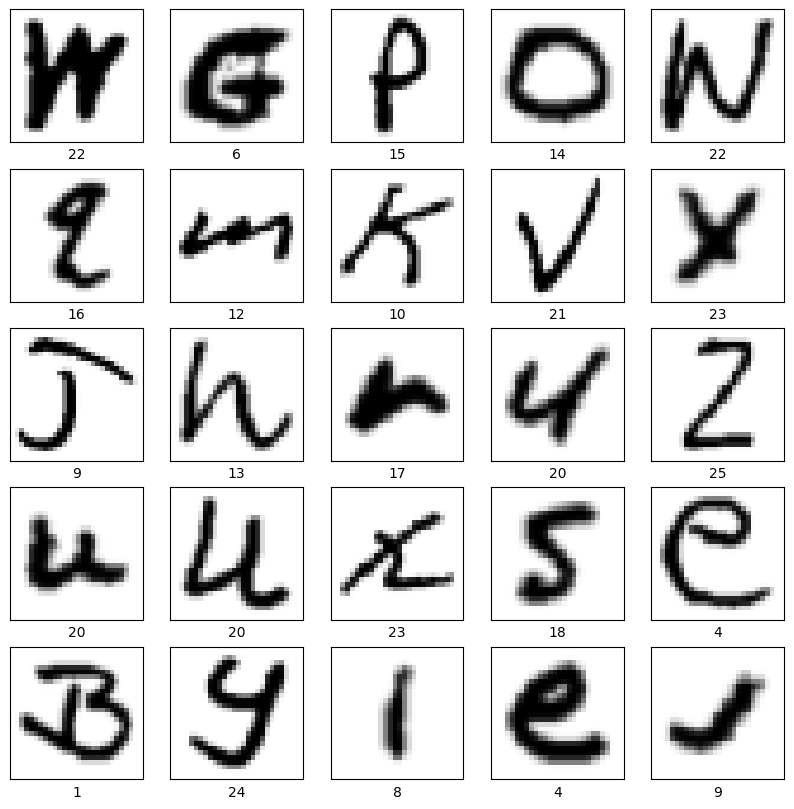

In [ ]:
char_to_display = 25
num_cells = math.ceil(math.sqrt(char_to_display))
plt.figure(figsize=(10,10))
for i in range(char_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

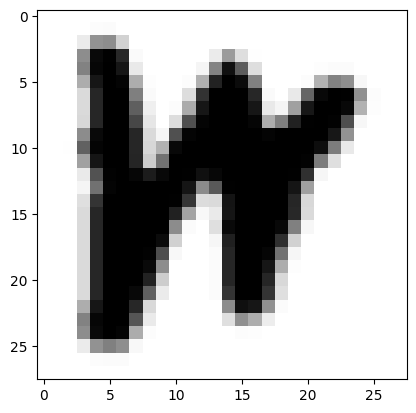

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()


FLATTEN INPUT

In [ ]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [ ]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.08,0.43,0.45,0.18,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.45,0.96,0.99,0.84,0.02,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.49,0.98,1.00,0.91,0.09,0.00,0.00,...,0.00,0.00,0.00,0.01,0.02,0.02,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.32,0.91,1.00,0.98,0.32,0.01,0.00,...,0.00,0.00,0.01,0.30,0.49,0.44,0.03,0.00,0.00,0.00
6,0.00,0.00,0.00,0.15,0.85,1.00,1.00,0.50,0.02,0.00,...,0.00,0.09,0.60,0.97,1.00,0.99,0.44,0.01,0.00,0.00
7,0.00,0.00,0.00,0.15,0.85,1.00,1.00,0.63,0.06,0.00,...,0.04,0.37,0.91,1.00,1.00,0.96,0.30,0.01,0.00,0.00
8,0.00,0.00,0.00,0.15,0.85,1.00,1.00,0.72,0.10,0.00,...,0.50,0.87,0.99,1.00,0.99,0.69,0.03,0.00,0.00,0.00
9,0.00,0.00,0.00,0.45,0.96,1.00,1.00,0.85,0.15,0.04,...,1.00,1.00,1.00,1.00,0.91,0.43,0.00,0.00,0.00,0.00


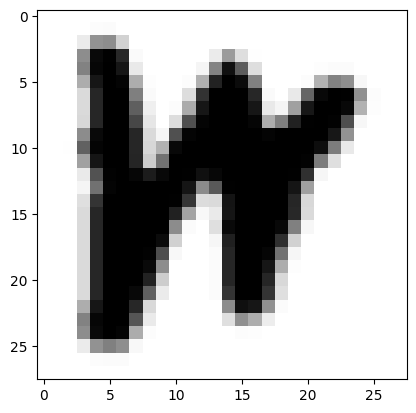

In [ ]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

#MODEL

In [ ]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=26,
    activation=tf.keras.activations.softmax
))

CHECK THE MODEL

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 26)                3354      
                                                                 
Total params: 120346 (470.10 KB)
Trainable params: 120346 (470.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


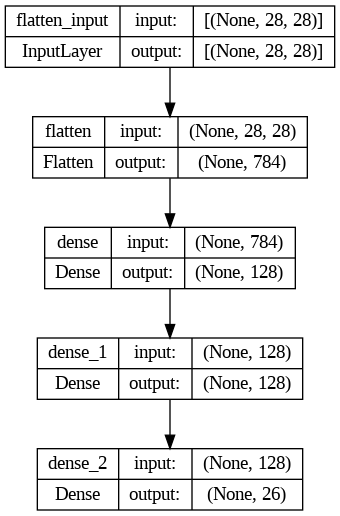

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

COMPILE MODEL (ADJUST LEARNING RATE)

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

TRAIN THE MODEL (60000 samples train 10 epochs with )




In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=3,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/3
3900/3900 [==============================] - 21s 4ms/step - loss: 1.0820 - accuracy: 0.7787 - val_loss: 0.8502 - val_accuracy: 0.8280
Epoch 2/3
3900/3900 [==============================] - 19s 5ms/step - loss: 0.7494 - accuracy: 0.8499 - val_loss: 0.7243 - val_accuracy: 0.8536
Epoch 3/3
3900/3900 [==============================] - 15s 4ms/step - loss: 0.6817 - accuracy: 0.8619 - val_loss: 0.6534 - val_accuracy: 0.8658


# EVALUATE AND TRAIN THE ACCURACY

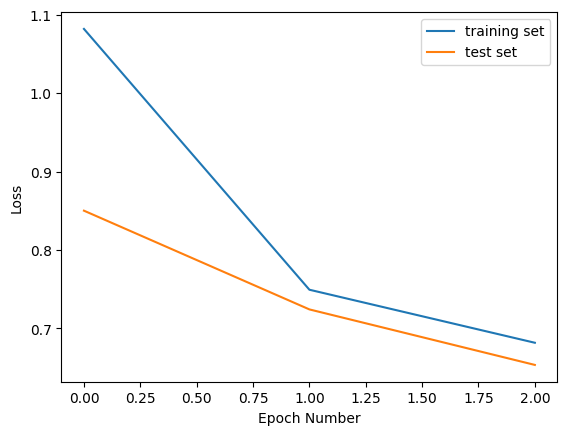

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()


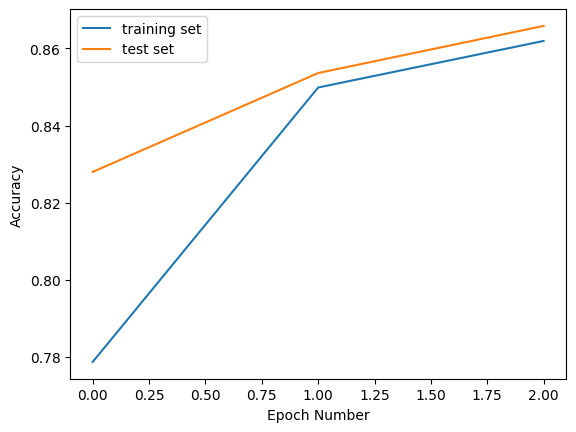

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)



In [ ]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)


Training loss:  0.628468930721283
Training accuracy:  0.8742868304252625


In [ ]:
model_name = 'mlp_AI_pj.h5'
model.save(model_name, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

USE THE MODEL

In [ ]:
predictions_one_hot = model.predict([x_test_normalized])

650/650 [==============================] - 1s 2ms/step


In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (20800, 26)


In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.736139,2.715416e-05,3.341654e-04,0.000063,1.097579e-01,3.644072e-03,1.451179e-02,3.072406e-03,0.000011,7.241191e-06,...,1.129685e-02,7.459468e-02,1.584741e-04,6.245128e-03,1.542155e-03,1.135645e-05,5.530252e-04,1.487130e-03,3.249101e-04,0.002063
1,0.886084,4.110543e-04,1.592118e-06,0.001599,6.661058e-06,2.240688e-03,1.787045e-02,4.526571e-02,0.000757,5.612981e-05,...,2.004820e-02,1.108887e-03,5.159398e-05,3.355443e-04,2.017760e-04,1.195473e-05,2.146553e-04,1.374150e-02,1.179504e-03,0.002943
2,0.459705,3.584230e-04,4.386302e-02,0.009413,2.350057e-03,1.014672e-04,1.033495e-01,1.029362e-04,0.001487,9.459704e-03,...,3.093183e-01,2.652504e-04,1.609958e-02,7.322726e-05,1.380321e-02,1.362260e-04,3.267776e-04,2.898160e-05,2.194139e-04,0.000737
3,0.514581,4.134293e-06,4.846312e-05,0.014508,5.049387e-07,1.149943e-08,1.298714e-02,1.897214e-06,0.000021,2.779270e-03,...,4.017168e-01,4.844413e-07,4.348722e-06,2.439550e-09,4.691215e-02,8.133316e-05,1.718051e-05,1.121435e-09,1.126993e-04,0.000003
4,0.713379,4.327671e-03,1.341264e-04,0.007046,9.985045e-05,1.180820e-02,3.608073e-02,1.409224e-01,0.000118,6.200009e-05,...,3.746295e-02,8.771419e-03,4.444032e-05,2.420616e-03,3.261598e-03,1.223222e-05,9.498186e-04,2.305460e-04,1.275218e-04,0.000469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,0.000058,1.008166e-03,2.285325e-06,0.000004,7.884989e-03,3.761266e-06,1.411148e-05,1.155253e-08,0.000004,1.033580e-07,...,5.926660e-06,3.371826e-05,3.111417e-08,1.196433e-05,3.547468e-10,9.250978e-12,7.450094e-11,1.184316e-07,5.973049e-09,0.990966
20796,0.000138,2.275462e-05,1.187854e-05,0.000275,1.185891e-04,5.113976e-06,4.663414e-05,4.901793e-07,0.007547,2.265566e-03,...,8.143527e-06,3.419488e-05,2.493374e-05,3.386472e-04,1.924897e-07,1.365126e-07,4.726845e-08,1.575481e-04,3.072255e-06,0.988952
20797,0.000028,2.518604e-06,1.677697e-07,0.000184,3.413669e-06,4.794264e-07,5.940290e-06,1.179556e-07,0.023299,6.441987e-04,...,6.717654e-06,1.126129e-05,1.808886e-06,5.436406e-05,3.320833e-08,5.363601e-08,9.471454e-09,2.556232e-04,2.825952e-07,0.975472
20798,0.001216,2.698309e-04,5.441621e-04,0.002840,1.418871e-03,2.899820e-05,7.731668e-02,2.971395e-06,0.064951,1.753229e-01,...,3.726325e-03,1.772705e-05,1.034948e-02,8.265254e-05,9.057643e-06,5.421722e-05,9.520886e-06,7.120422e-04,1.052662e-03,0.659387


In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,0
1,0
2,0
3,0
4,0
...,...
20795,25
20796,25
20797,25
20798,25


In [ ]:
print('Precision Score: ',precision_score(y_test, predictions , average="macro"))
print('Recall Score: ',recall_score(y_test, predictions , average="macro"))
print('F1 Score: ',f1_score(y_test, predictions , average="macro"))

Precision Score:  0.8699257249433915
Recall Score:  0.8658173076923078
F1 Score:  0.8662051183205376


In [ ]:
print(predictions[0])

0


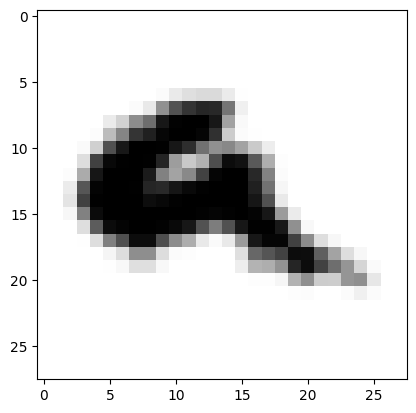

In [ ]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

# CONFUSION CHECK

<ipython-input-32-4e0d0ab70e99>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


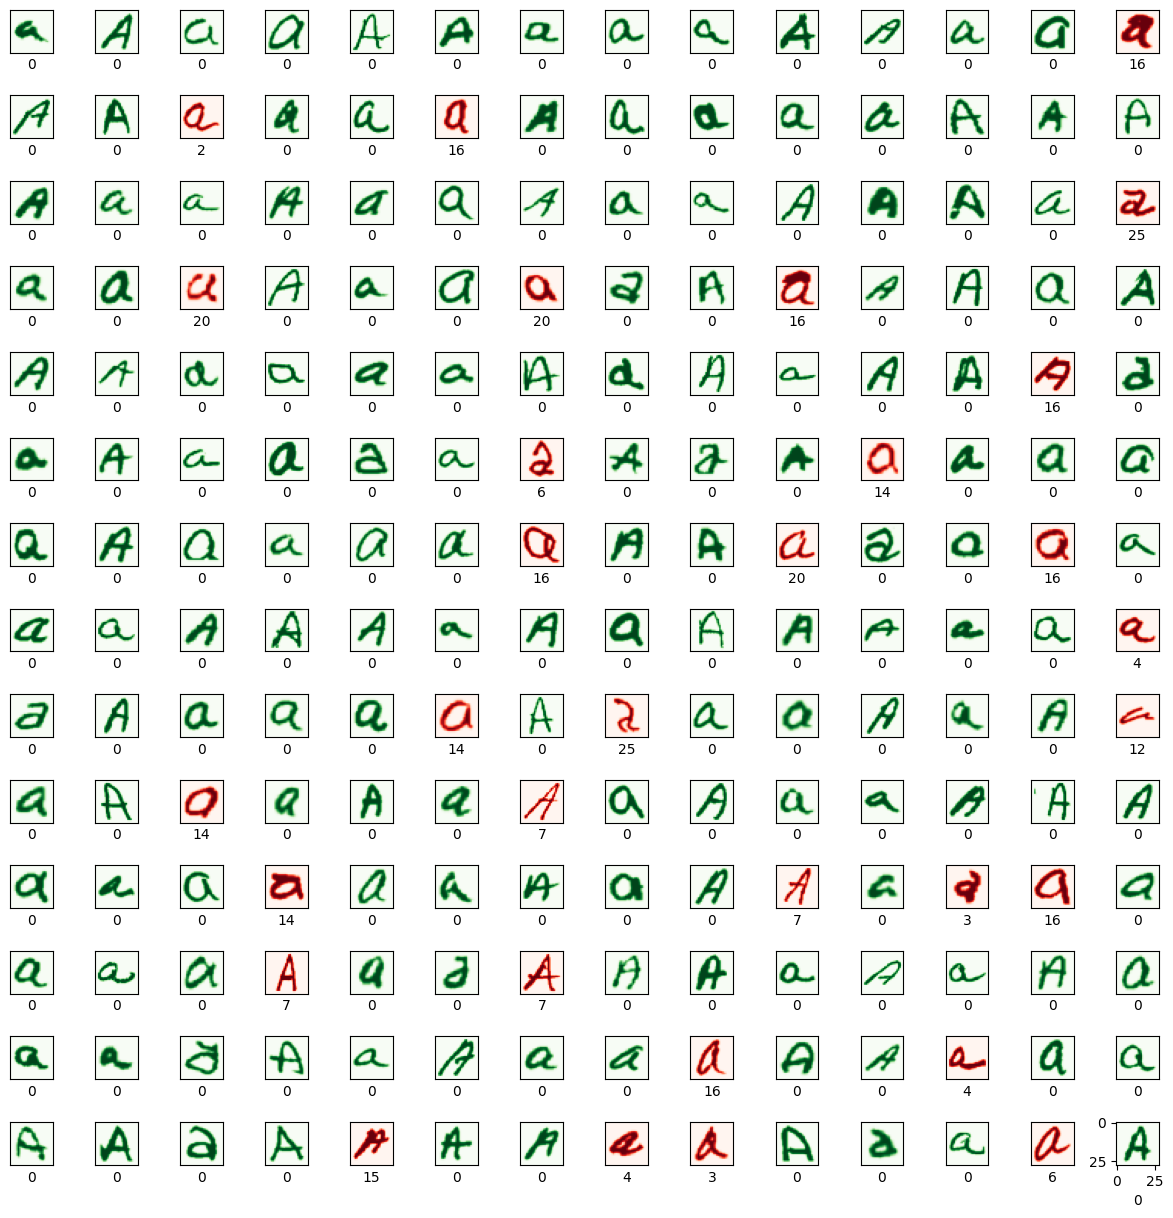

In [ ]:
char_to_display = 196
num_cells = math.ceil(math.sqrt(char_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(char_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

** DÙNG CONFUSION MATRIX ĐỂ THẤY NHỮNG CHỮ MÁY PHÂN BIỆT TỐT VÀ CHỮ DỄ NHẦM LẪN**

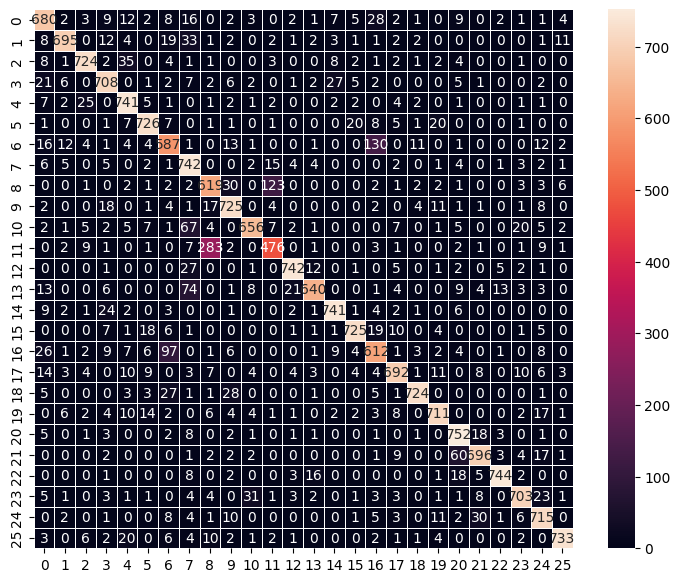

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# PRACTICAL HANDWRITING THROUGH GRADIO

In [ ]:
%pip install -q typing-extensions==4.5.0 kaleido accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.6/381.6 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.3/395.3 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import gradio as gr

def predict_char(image):
    # Convert the input image to a numpy array
    image = np.array(image).astype(float)
    image /= 255

    # Reshape the image to match the EMNIST dataset's shape (28x28 pixels)
    image = image.reshape(1, 28, 28, 1)

    # Make a prediction using the MLP model
    processing = model.predict(image)

    prediction = np.argmax(processing)

    # Turn the output from numbers to letters
    letters = 97
    so = 0
    for so in range (26):
      if prediction == so:
        prediction = chr(letters)
      letters += 1
      so += 1

    # Output
    return str(prediction)



iface = gr.Interface(
    fn=predict_char,
    inputs='sketchpad',
    outputs="text",
    live=True,
    title="MLP-Based Letter Recognition",
    description="Draw a letter (a-z) and let the model predict it.",

)

iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d05b58fd5601aedb5c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
